In [2]:
"""
author Daniel
"""
from pandas import read_csv
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from io import StringIO
from sklearn import linear_model
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

print("Name: Daniel Ashcroft \nStudent ID: r00168428")
#Note: Not all the libararies above are necessarily needed for this project and not all 
#the libraries you need for this project are necessarily listed above.


""" Your Name and Your student ID: 
Daniel Ashcroft
r00168428
"""

Name: Daniel Ashcroft 
Student ID: r00168428


' Your Name and Your student ID: \nDaniel Ashcroft\nr00168428\n'

In [19]:

def task1():
    """
    The data needed to be encoded.
    I saved both datasets but I actually just reused the X as they are the same.
    The first model with y instead of loan was more accurate. They to use 'no' a lot more than needed.
    """
    print("--------task1--------")
    bank = pd.read_csv("bank.csv")
    task1_dataset1_csv_file_name = "task1_dataset1.csv"
    task1_dataset2_csv_file_name = "task1_dataset2.csv"
    
    
    # creates and saves the first data set

    dataset1 = bank[["age","job","poutcome","balance","default","y"]]  
    dataset1.to_csv(task1_dataset1_csv_file_name)
    print("dataset1 saved to file as", task1_dataset1_csv_file_name)

    # creates and saves the second data set
    
    dataset2 = bank[["age","job","poutcome","balance","default","loan"]]
    dataset2.to_csv(task1_dataset2_csv_file_name)
    print("dataset2 saved to file as", task1_dataset2_csv_file_name)

    
    

    #gets the data and shows it
    dataset1 = pd.read_csv(task1_dataset1_csv_file_name)
    dataset2 = pd.read_csv(task1_dataset2_csv_file_name)

    #which columns are categorical
    Xdataset_catg_cols = ["job","poutcome","default"]
    # all columns
    Xdataset_cols = ["age","job","poutcome","balance","default"]
    X = dataset1[Xdataset_cols]

    # this will encode the data from the columns with categorical data
    le = LabelEncoder()
    X[Xdataset_catg_cols] = X[Xdataset_catg_cols].apply(lambda col: le.fit_transform(col))

    # data set 1s y class atribute
    ydataset1 = dataset1['y']
    
    print("\n\nOur data set X value encoded:\n",X)
    print("\nOur y class atribute:\n",ydataset1)

    # using DecisionTreeClassifier for classification algorithm
    clf_y = DecisionTreeClassifier()
#     clf_y.fit(X.head(100),ydataset1.head(100))
    clf_y.fit(X,ydataset1)

    y_predictions = clf_y.predict(X.head(100))
    y_predictions_as_series = pd.Series(y_predictions)
    test_labels1 = ydataset1.head(100)

    res1 = accuracy_score(test_labels1, y_predictions_as_series)
    print("\n\naccuracy_score with first data set:\n",res1)
    #it only gives  NOs
    
    # data set 2s loan class attribute
    loan_dataset2 = dataset2['loan']

    clf_loan = DecisionTreeClassifier()
#     clf_loan.fit(X.head(100),loan_dataset2.head(100))
    clf_loan.fit(X,loan_dataset2)
    loan_predictions = clf_y.predict(X.head(100))
    loan_predictions_as_series = pd.Series(loan_predictions)

    test_labels2 = loan_dataset2.head(100)

    res1 = accuracy_score(test_labels2, loan_predictions_as_series)
    print("\n\naccuracy_score with second data set:\n",res1)
    
    
    print()
    print()
    print("Conclusion:")
    print("The data needed to be encoded")
    print("The first the data set with the y as there classifier has a slight higher accuracy")
    
    print()
    print("Possible error: We can see  for loan predictions especially that our models seem to use 'no' much more than 'yes' than needed")
    print("amount of value counts for y predictions:\n",y_predictions_as_series.value_counts())
    print("amount of value counts for y actual:\n",ydataset1.value_counts())
    print("amount of value counts for loan predictions:\n",loan_predictions_as_series.value_counts())
    print("amount of value counts for loan actual:\n",loan_dataset2.value_counts())
    

#0.8829709583950809 is less than 0.8398177434695097
# class attribute with y has a higher accuracy score
    
    

    print("--------end task1--------")






task1()

--------task1--------
dataset1 saved to file as task1_dataset1.csv
dataset2 saved to file as task1_dataset2.csv


Our data set X value encoded:
        age  job  poutcome  balance  default
0       58    4         3     2143        0
1       44    9         3       29        0
2       33    2         3        2        0
3       47    1         3     1506        0
4       33   11         3        1        0
...    ...  ...       ...      ...      ...
45206   51    9         3      825        0
45207   71    5         3     1729        0
45208   72    5         2     5715        0
45209   57    1         3      668        0
45210   37    2         1     2971        0

[45211 rows x 5 columns]

Our y class atribute:
 0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object


C:\Users\Dashc\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]




accuracy_score with first data set:
 1.0


accuracy_score with second data set:
 0.76


Conclusion:
The data needed to be encoded
The first the data set with the y as there classifier has a slight higher accuracy

Possible error: We can see  for loan predictions especially that our models seem to use 'no' much more than 'yes' than needed
amount of value counts for y predictions:
 no     97
yes     3
dtype: int64
amount of value counts for y actual:
 no     39922
yes     5289
Name: y, dtype: int64
amount of value counts for loan predictions:
 no     97
yes     3
dtype: int64
amount of value counts for loan actual:
 no     37967
yes     7244
Name: loan, dtype: int64
--------end task1--------


--------task2--------
dataset saved
       age   marital
0       58   married
1       44    single
2       33   married
3       47   married
4       33    single
...    ...       ...
45206   51   married
45207   71  divorced
45208   72   married
45209   57   married
45210   37   married

[45211 rows x 2 columns]
['married' 'single' 'divorced']
count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


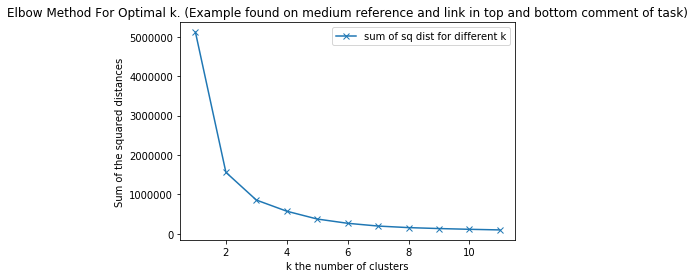

We can see elbow at 3, the optimal number cluster
reference, used this post on medium: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
--------end task2--------


In [5]:
def task2():
    '''
    used this post on medium: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
    I used the elbow method here to visualise which is the best
    The optimal number of clusters is 3
    '''
    print("--------task2--------")

    # for creating and saving the data set.

    bank = pd.read_csv("bank.csv")
    task2_dataset_csv_file_name = "task2_dataset.csv"
    task2_dataset_cols = ["age","marital"]
    dataset = bank[task2_dataset_cols]
    dataset.to_csv(task2_dataset_csv_file_name)
    print("dataset saved")

    # reads data, excluding the row number

    dataset = pd.read_csv(task2_dataset_csv_file_name)[task2_dataset_cols]
    print(dataset)

    # we are going to encode the marital categorical data 
    print(dataset.marital.unique())

    le = LabelEncoder()
    dataset.marital = le.fit_transform(dataset.marital)

    print(dataset.age.describe())
    Sum_of_squared_distances = []
    K = range(1,12)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(dataset)
        Sum_of_squared_distances.append(km.inertia_)


    plt.plot(K, Sum_of_squared_distances, 'x-')
    plt.xlabel('k the number of clusters')
    plt.ylabel('Sum of the squared distances')
    plt.title('Elbow Method For Optimal k. (Example found on medium reference and link in top and bottom comment of task)')
    plt.legend(["sum of sq dist for different k"])
    plt.show()

    print("We can see elbow at 3, the optimal number cluster")
    print("reference, used this post on medium: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f")


    print("--------end task2--------")

task2()

--------task3--------
dataset saved
[0.76, 0.61, 0.46, 0.42, 0.41, 0.45, 0.36, 0.32, 0.31, 0.36, 0.26, 0.32, 0.25]


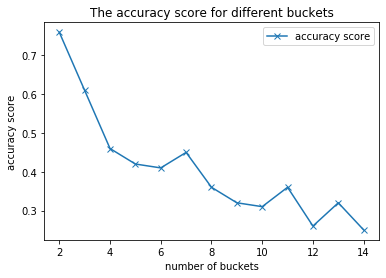

The highest accuracy score is with 2 buckets
------end task3------


In [6]:
def task3():
    """
    Testing the accuracy with SVM for a range of bucket amounts
    """
    print("--------task3--------")

    # for creating and saving the data set.
    bank = pd.read_csv("bank.csv")
    task3_dataset_csv_file_name = "task3_dataset.csv"
    task3_dataset_cols = ["y","loan","bank_arg1"]
    dataset = bank[task3_dataset_cols]
    dataset.to_csv(task3_dataset_csv_file_name)
    print("dataset saved")

    # reads data, excluding the row number

    dataset = pd.read_csv(task3_dataset_csv_file_name)[task3_dataset_cols]
    dataset_catg_cols = ["y","loan"]

    # this will encode the data from the columns with categorical data
    le = LabelEncoder()
    dataset[dataset_catg_cols] = dataset[dataset_catg_cols].apply(lambda col: le.fit_transform(col))

    scores = []

    # testing with range of buckets
    range_number_of_buckets = range(2,15)
    for number_of_buckets in range_number_of_buckets:
        temp_dataset = dataset.copy()

        #bucketing
        temp_dataset["bank_arg1"] = pd.qcut(dataset["bank_arg1"],number_of_buckets,labels=False)
        # enc = KBinsDiscretizer(n_bins=10, encode='onehot')


        y = temp_dataset["bank_arg1"]
        X = temp_dataset[["y","loan"]]

        # X_binned = enc.fit_transform(X)

    
        clf = SVC()
        clf.set_params(kernel='linear')
        clf.fit(X.head(100),y.head(100))
        y_predictions = pd.Series(clf.predict(X.head(100)))
        score = accuracy_score(y.head(100), y_predictions)
        scores.append(score)
    #     print(scores)


    print(scores)
    plt.plot(range_number_of_buckets, scores, 'x-')
    plt.xlabel('number of buckets')
    plt.ylabel('accuracy score')
    plt.title('The accuracy score for different buckets')
    plt.legend(["accuracy score"])
    plt.show()

    print("The highest accuracy score is with 2 buckets")

    print("------end task3------")
task3()

--------task4--------
dataset saved
       age           job   marital  education loan    y
0       58    management   married   tertiary   no   no
1       44    technician    single  secondary   no   no
2       33  entrepreneur   married  secondary  yes   no
3       47   blue-collar   married    unknown   no   no
4       33       unknown    single    unknown   no   no
...    ...           ...       ...        ...  ...  ...
45206   51    technician   married   tertiary   no  yes
45207   71       retired  divorced    primary   no  yes
45208   72       retired   married  secondary   no  yes
45209   57   blue-collar   married  secondary   no   no
45210   37  entrepreneur   married  secondary   no   no

[45211 rows x 6 columns]
       age  job  marital  education  loan
0       58    4        1          2     0
1       44    9        2          1     0
2       33    2        1          1     1
3       47    1        1          3     0
4       33   11        2          3     0
...    ...  ..

C:\Users\Dashc\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


KNN: 0.976227 (0.002423)
CART: 0.956316 (0.008325)
NB: 0.976227 (0.002423)
SVM: 0.976227 (0.002423)


C:\Users\Dashc\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dashc\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dashc\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dashc\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Das

RF: 0.976227 (0.002423)


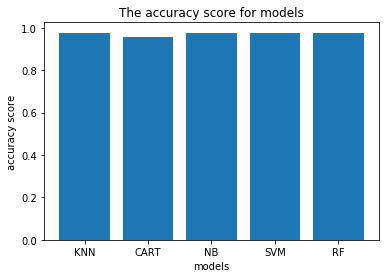

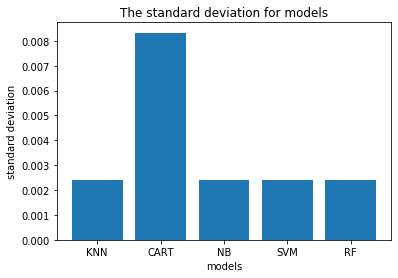

It seems DecisionTreeClassifier is the worst
SVM is very slow to fit
KNeighborsClassifier, GaussianNB or RandomForestClassifier are good depending on what you want to do
------end task4------


In [7]:
def task4():
    """
    It seems DecisionTreeClassifier has the worst accuracy and has a higher standard deviation
    SVM is very slow to fit
    KNeighborsClassifier, GaussianNB or RandomForestClassifier are good depending on what you want to do
    """
    print("--------task4--------")
    bank = pd.read_csv("bank.csv")
    task4_dataset_csv_file_name = "task4_dataset.csv"
    task4_dataset_cols = ["age","job","marital","education","loan","y"]
    dataset = bank[task4_dataset_cols]
    dataset.to_csv(task4_dataset_csv_file_name)
    print("dataset saved")
    # reads data, excluding the row number
    dataset = pd.read_csv(task4_dataset_csv_file_name)[task4_dataset_cols]

    # setting X
    X = dataset[["age","job","marital","education","loan"]]
    X_catg_cols = ["job","marital","education","loan"]

    # encoding X
    le = LabelEncoder()
    X[X_catg_cols] = X[X_catg_cols].apply(lambda col: le.fit_transform(col))
    print(dataset)
    print(X)
    amount = int(len(dataset.index)/25)
    X = X.head(amount)
    print(len(dataset.index))
    print(len(X.index))

    # setting y

    y = dataset['y']
    y = y.head(amount)
    
    # setting models
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))
    models.append(('RF', RandomForestClassifier(max_depth=2, random_state=0)))
    # models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

    print(models)
    
    #cross validation
    results = []
    names = []
    results_mean = []
    results_std = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=10, random_state=1)
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        results_mean.append(cv_results.mean())
        results_std.append(cv_results.std())
        print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

        
    
    plt.bar(names, results_mean)
    plt.xlabel('models')
    plt.ylabel('accuracy score')
    plt.title('The accuracy score for models')
    plt.show()

    plt.bar(names, results_std)
    plt.xlabel('models')
    plt.ylabel('standard deviation')
    plt.title('The standard deviation for models')
    plt.show()

    print("It seems DecisionTreeClassifier is the worst")
    print("SVM is very slow to fit")
    print("KNeighborsClassifier, GaussianNB or RandomForestClassifier are good depending on what you want to do")
    
    
    print("------end task4------")
    
task4()

--------task5--------
dataset saved
       bank_arg1  bank_arg2
0           0.15       0.18
1           0.17       0.13
2           0.38       0.20
3           0.15       0.13
4           0.17       0.12
...          ...        ...
45206       0.52       0.40
45207       0.55       0.36
45208       0.60       0.31
45209       0.17       0.18
45210       0.10       0.17

[45211 rows x 2 columns]
With k as  1


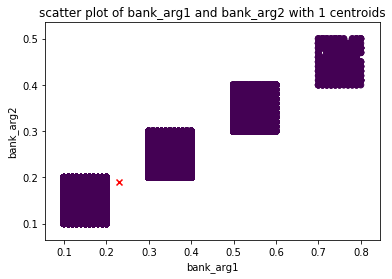

With k as  2


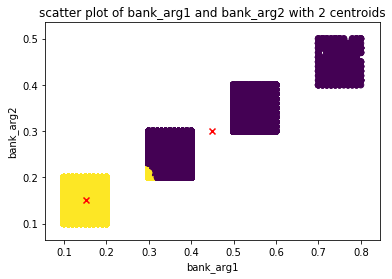

With k as  3


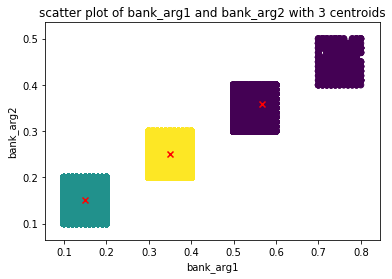

With k as  4


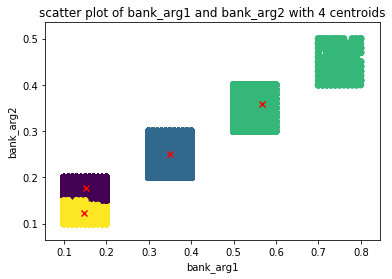

With k as  5


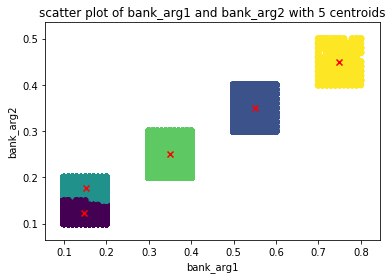

No handles with labels found to put in legend.


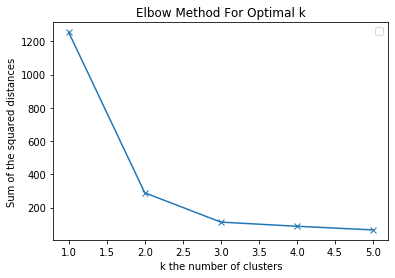

Altough the elbow method recommends otherwise. Only with k is 5 that the last region gets properly considered as it's own cluster
------end task5------


In [8]:
def task5():
    """
    Clusters and plots with kmeans with different k
    Altough the elbow method here recommends otherwise. Only with k is 5 that the last region gets properly considered as it's own cluster
    """
    print("--------task5--------")

    #creates data set

    bank = pd.read_csv("bank.csv")
    task5_dataset_csv_file_name = "task5_dataset.csv"
    task5_dataset_cols = ['bank_arg1',"bank_arg2"]
    dataset = bank[task5_dataset_cols]
    dataset.to_csv(task5_dataset_csv_file_name)
    print("dataset saved")

    dataset = pd.read_csv(task5_dataset_csv_file_name)[task5_dataset_cols]

    print(dataset)






    Sum_of_squared_distances = []

     # runs Kmeans for different number of clusters 
        
    K = range(1,6)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(dataset)

        cl_centers = km.cluster_centers_
        km_labels = km.labels_
        print("With k as ",k)
    #     for i, l in enumerate(km.labels_):

    #         plt.scatter(dataset["bank_arg1"].get(i), dataset["bank_arg2"].get(i), color=colours[l], marker=markers[l])
    
        title = 'scatter plot of bank_arg1 and bank_arg2 with ' + str(k) + " centroids"
        
        # plots by the kmeans labels for colours
        plt.scatter(dataset["bank_arg1"], dataset["bank_arg2"],c=km.labels_.astype(float))
        plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='red', marker='x')
        plt.xlabel('bank_arg1')
        plt.ylabel('bank_arg2')
        plt.title(title)
        plt.show()
        Sum_of_squared_distances.append(km.inertia_)

        
    plot_title = 'Elbow Method For Optimal k'
    plt.plot(K, Sum_of_squared_distances, 'x-')
    plt.xlabel('k the number of clusters')
    plt.ylabel('Sum of the squared distances')
    plt.title(plot_title)
    plt.legend()
    plt.show()


    print("Altough the elbow method recommends otherwise. Only with k is 5 that the last region gets properly considered as it's own cluster")
    print("------end task5------")
task5()

In [9]:
def task6():
    """
    https://stackoverflow.com/questions/35097003/cross-validation-decision-trees-in-sklearn
    Here the machine learning algorthm overfits and produces a model that doesn't capture the tread of data. 
    I used cross validation to try to deal with overfitting

    """
    print("--------task6--------")

    # creates and saves the dataset
    bank = pd.read_csv("bank.csv")
    task6_dataset_csv_file_name = "task6_dataset.csv"
    task6_dataset_cols = ['housing',"balance",'y']
    task6_dataset_catg_cols = ['housing']
    dataset = bank[task6_dataset_cols]
    dataset.to_csv(task6_dataset_csv_file_name)
    print("dataset saved")

    dataset = pd.read_csv(task6_dataset_csv_file_name)[task6_dataset_cols]
    le = LabelEncoder()
    dataset[task6_dataset_catg_cols] = dataset[task6_dataset_catg_cols].apply(lambda col: le.fit_transform(col))

    print(dataset)
    X_train = dataset[['housing',"balance"]].head(10000)
    y_train = dataset['y'].head(10000)
    X_test = dataset[['housing',"balance"]].tail(1000)
    y_test = dataset['y'].tail(1000)
    clf = DecisionTreeClassifier()
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred_train = clf.predict(X_train)
    training_score = accuracy_score(y_train, y_pred_train)
    print(training_score)

    y_pred_test = clf.predict(X_test)
    testing_score = accuracy_score(y_test, y_pred_test)
    print(testing_score)
    print("training_score and the testing_score are very different")



    # We can use cross validation for example

    parameters = {'max_depth':range(3,20)}
    clf_with_grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
    clf_with_grid_search.fit(X=X_train, y=y_train)
    tree_model = clf_with_grid_search.best_estimator_
    print (clf_with_grid_search.best_score_, clf_with_grid_search.best_params_) 

    y_pred_test = clf_with_grid_search.predict(X_test)
    testing_score = accuracy_score(y_test, y_pred_test)
    print(testing_score)


    depth = []
    for i in range(2,20):
        clf = DecisionTreeClassifier(max_depth=i)
        # Perform 7-fold cross validation 
        scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=7, n_jobs=4)
        depth.append((i,scores.mean()))
    print(depth)

    print("------end task6------")
task6()

--------task6--------
dataset saved
       housing  balance    y
0            1     2143   no
1            1       29   no
2            1        2   no
3            1     1506   no
4            0        1   no
...        ...      ...  ...
45206        0      825  yes
45207        0     1729  yes
45208        0     5715  yes
45209        0      668   no
45210        0     2971   no

[45211 rows x 3 columns]
0.9751
0.51
training_score and the testing_score are very different


C:\Users\Dashc\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9646 {'max_depth': 3}
0.511
[(2, 0.9649999957995795), (3, 0.9648999557835731), (4, 0.9647999157675667), (5, 0.9645999757495721), (6, 0.9640997756695401), (7, 0.9639996656465246), (8, 0.9636997556195327), (9, 0.9633997055785226), (10, 0.9628996455125087), (11, 0.9624996254625013), (12, 0.9619996354034966), (13, 0.9616994453484684), (14, 0.9614993653164555), (15, 0.9609993052504417), (16, 0.9600991551274115), (17, 0.9588992349914074), (18, 0.9586991549593946), (19, 0.9584990749273817)]
------end task6------


In [35]:
# task7():
print("--------task7--------")
# creates and saves the dataset
bank = pd.read_csv("bank.csv")
task7_dataset_csv_file_name = "task7_dataset.csv"
task7_dataset_cols = ['loan',"balance",'y','bank_arg1']
task7_dataset_catg_cols = ['loan','y']
# task7_dataset_catg_cols = ['housing']
dataset = bank[task7_dataset_cols]
dataset.to_csv(task7_dataset_csv_file_name)
print("dataset saved")

dataset = pd.read_csv(task7_dataset_csv_file_name)[task7_dataset_cols]
print(dataset)

# encoding the categorical data
le = LabelEncoder()
dataset[task7_dataset_catg_cols] = dataset[task7_dataset_catg_cols].apply(lambda col: le.fit_transform(col))

#cutting bank_arg1 into buckets
dataset["bank_arg1"] = pd.qcut(dataset["bank_arg1"],2,labels=False)
# enc = KBinsDiscretizer(n_bins=4, encode='onehot')
# dataset = enc.fit_transform(dataset)

print(dataset)
X = dataset[['loan',"balance",'y']]
Y = dataset['bank_arg1']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)
print(X_train)

# DecisionTreeClassifier
clf_dtree = DecisionTreeClassifier()
clf_dtree.fit(X_train,y_train)

clf_dtree_pred = clf_dtree.predict(X_test)

clf_dtree_score = accuracy_score(clf_dtree_pred, y_test)

print("DecisionTreeClassifier score:")
print(clf_dtree_score)


clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(X_train,y_train)

clf_rf_pred = clf_rf.predict(X_test)

clf_rf_score = accuracy_score(clf_rf_pred, y_test)

print("RandomForestClassifier score")
print(clf_rf_score)

print("RandomForestClassifier has a better score")

print("------end task7------")
# task7()    

--------task7--------
dataset saved
      loan  balance    y  bank_arg1
0       no     2143   no       0.15
1       no       29   no       0.17
2      yes        2   no       0.38
3       no     1506   no       0.15
4       no        1   no       0.17
...    ...      ...  ...        ...
45206   no      825  yes       0.52
45207   no     1729  yes       0.55
45208   no     5715  yes       0.60
45209   no      668   no       0.17
45210   no     2971   no       0.10

[45211 rows x 4 columns]
       loan  balance  y  bank_arg1
0         0     2143  0          0
1         0       29  0          0
2         1        2  0          1
3         0     1506  0          0
4         0        1  0          0
...     ...      ... ..        ...
45206     0      825  1          1
45207     0     1729  1          1
45208     0     5715  1          1
45209     0      668  0          0
45210     0     2971  0          0

[45211 rows x 4 columns]
       loan  balance  y
18391     0     4853  0
13056     1 

C:\Users\Dashc\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
